In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

In [295]:
tickers=pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Components')[2]
tickers=tickers['Symbol'].to_list()
tickers

['MMM',
 'AXP',
 'AMGN',
 'AMZN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'GS',
 'HD',
 'HON',
 'IBM',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'NVDA',
 'PG',
 'CRM',
 'SHW',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WMT']

In [296]:
data=yf.download(tickers,'2021-01-01')['Close']
data

C:\Users\user\AppData\Local\Temp\ipykernel_13280\3459401620.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,'2021-01-01')['Close']
[*********************100%***********************]  30 of 30 completed


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,126.239700,196.605698,159.331497,111.249779,202.720001,166.105850,218.396286,38.470222,70.028625,174.766510,...,209.617203,131.980606,13.078190,122.463928,231.698990,123.670853,326.359283,210.791321,44.364780,45.834347
2021-01-05,127.800453,197.559860,160.925507,111.843559,211.630005,167.464600,219.595795,38.487732,71.921730,175.514053,...,209.819366,133.045105,13.368656,123.245888,230.542831,122.649750,321.970490,207.645340,44.161243,45.590355
2021-01-06,123.498520,202.321899,156.919006,115.981018,211.029999,176.784424,214.272415,38.855286,74.236450,176.182892,...,204.378922,134.100204,12.580534,124.543236,231.340347,126.816200,335.482330,205.815811,44.696480,45.874992
2021-01-07,127.712708,202.989807,158.108002,115.063614,212.710007,177.121811,216.086533,39.345352,74.583672,175.651764,...,210.194931,136.549500,13.308068,123.379173,235.433228,126.788872,340.861084,206.967712,44.595909,45.871883
2021-01-08,128.815033,206.867111,159.134995,115.177101,209.899994,177.149155,220.111267,39.432865,75.294609,175.759949,...,211.475632,137.868378,13.241000,123.325859,233.396347,127.317574,339.329620,208.555252,44.039692,45.865631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-25,213.880005,306.579987,231.440002,311.609985,233.059998,433.750000,269.109985,68.690002,154.839996,121.470001,...,513.710022,76.269997,173.500000,158.300003,340.100006,261.049988,281.059998,357.040009,43.080002,97.470001
2025-07-28,214.050003,301.290009,232.789993,310.739990,236.410004,432.940002,270.250000,67.919998,156.279999,120.370003,...,512.500000,79.239998,176.750000,157.110001,336.160004,254.910004,282.119995,355.470001,42.360001,97.610001
2025-07-29,211.270004,303.559998,231.009995,308.540009,226.080002,430.049988,267.390015,67.959999,157.029999,119.910004,...,512.570007,78.330002,175.509995,156.610001,336.970001,259.820007,261.070007,351.290009,42.709999,98.330002


In [297]:
returns=data.pct_change().dropna()
returns

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.012363,0.004853,0.010004,0.005337,0.043952,0.008180,0.005492,0.000455,0.027033,0.004277,...,0.000964,0.008066,0.022210,0.006385,-0.004990,-0.008257,-0.013448,-0.014925,-0.004588,-0.005323
2021-01-06,-0.033661,0.024104,-0.024897,0.036993,-0.002835,0.055653,-0.024242,0.009550,0.032184,0.003811,...,-0.025929,0.007930,-0.058953,0.010527,0.003459,0.033970,0.041966,-0.008811,0.012120,0.006243
2021-01-07,0.034123,0.003301,0.007577,-0.007910,0.007961,0.001908,0.008466,0.012613,0.004677,-0.003015,...,0.028457,0.018265,0.057830,-0.009347,0.017692,-0.000215,0.016033,0.005597,-0.002250,-0.000068
2021-01-08,0.008631,0.019101,0.006496,0.000986,-0.013211,0.000154,0.018626,0.002224,0.009532,0.000616,...,0.006093,0.009659,-0.005040,-0.000432,-0.008652,0.004170,-0.004493,0.007670,-0.012472,-0.000136
2021-01-11,-0.023249,-0.003858,-0.021519,-0.005912,-0.014817,-0.002059,-0.017069,0.006658,0.005709,0.002239,...,-0.009699,0.004783,0.025967,-0.006773,0.008466,-0.015897,-0.007265,-0.011882,-0.005882,0.004501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-25,0.000561,-0.006385,-0.003402,0.010900,0.007740,0.009848,0.005267,0.005857,-0.006353,-0.003936,...,0.005539,0.011270,-0.001381,-0.003211,-0.000323,-0.003588,0.008902,0.008673,0.000000,0.009006
2025-07-28,0.000795,-0.017255,0.005833,-0.002792,0.014374,-0.001867,0.004236,-0.011210,0.009300,-0.009056,...,-0.002355,0.038941,0.018732,-0.007517,-0.011585,-0.023520,0.003771,-0.004397,-0.016713,0.001436
2025-07-29,-0.012988,0.007534,-0.007646,-0.007080,-0.043695,-0.006675,-0.010583,0.000589,0.004799,-0.003822,...,0.000137,-0.011484,-0.007016,-0.003182,0.002410,0.019262,-0.074614,-0.011759,0.008262,0.007376


In [298]:
expected_returns=returns.mean()*252
cov_matrix=returns.cov()*252

In [299]:
expected_returns

Ticker
AAPL    0.150909
AMGN    0.119875
AMZN    0.147876
AXP     0.262358
BA      0.090523
CAT     0.256087
CRM     0.102786
CSCO    0.151817
CVX     0.204162
DIS    -0.040342
GS      0.283525
HD      0.126349
HON     0.058127
IBM     0.240379
JNJ     0.056169
JPM     0.246065
KO      0.099805
MCD     0.117014
MMM     0.084197
MRK     0.064037
MSFT    0.240364
NKE    -0.061240
NVDA    0.719012
PG      0.061550
SHW     0.113074
TRV     0.190679
UNH    -0.011258
V       0.137803
VZ      0.015001
WMT     0.188939
dtype: float64

In [300]:
def portfolio_variance(W):
    return (W.dot(cov_matrix)).dot(W)

In [301]:
n_assets=len(data.columns)
n_assets

30

In [302]:
initial_weights=np.array([1/n_assets for i in range(n_assets)])

In [303]:
np.linspace(0,10,4)

array([ 0.        ,  3.33333333,  6.66666667, 10.        ])

In [304]:
target_returns=np.linspace(expected_returns.min(),expected_returns.max(),50)

In [305]:
target_returns

array([-0.0612404 , -0.04531688, -0.02939335, -0.01346983,  0.0024537 ,
        0.01837722,  0.03430075,  0.05022427,  0.06614779,  0.08207132,
        0.09799484,  0.11391837,  0.12984189,  0.14576541,  0.16168894,
        0.17761246,  0.19353599,  0.20945951,  0.22538303,  0.24130656,
        0.25723008,  0.27315361,  0.28907713,  0.30500065,  0.32092418,
        0.3368477 ,  0.35277123,  0.36869475,  0.38461828,  0.4005418 ,
        0.41646532,  0.43238885,  0.44831237,  0.4642359 ,  0.48015942,
        0.49608294,  0.51200647,  0.52792999,  0.54385352,  0.55977704,
        0.57570056,  0.59162409,  0.60754761,  0.62347114,  0.63939466,
        0.65531819,  0.67124171,  0.68716523,  0.70308876,  0.71901228])

In [306]:
target_vols=[]
for target_return in target_returns:
    constraints=({'type':'eq','fun':lambda x: np.sum(x)-1},
                {'type':'eq','fun':lambda x: x.dot(expected_returns)-target_return})
    bonds=[[0,1]]*n_assets

    result=minimize(portfolio_variance,initial_weights,method='SLSQP',bounds=bonds,
                   constraints=constraints)
    target_vols.append(result.fun**(1/2))

Text(0.5, 1.0, 'EF for DIJA')

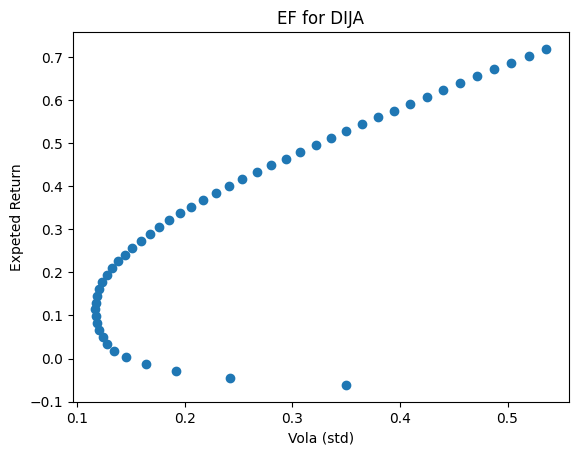

In [307]:
plt.scatter(target_vols,target_returns,label='EF')
plt.xlabel('Vola (std)')
plt.ylabel('Expeted Return')
plt.title('EF for DIJA')